# Target analysis
**Purpose**:
* put features into context with predicted or actual target values
  * analyse feature distribution per group in binary classification
  * check correlation of features with target value
* check 'certainty' of the model predictions by plotting `prob_distrib_per_class` to see how certain the model is in predicting each class
* visually check predicted vs actual(ground truth values)
  * by simple scatter plot
  * by 'improved scatter plot' (`joint_dist`) - this can be usefull if the actual values form a cluster (eg. regression applied to clusters of users) and we want check if the model predictions also form a nice cluster with similar distribution as actual values

**Intended use**:
* check how your model is performing
* check the possible connection between feature and target values (eg. if the distributions of features are different for each class)

## Imports

In [1]:
import os
import sys

sys.path.append(os.getcwd())
os.chdir("../..")

import pandas as pd
from inference_model.eda.target.analysis import correlation
from inference_model.eda.target.plotting import (
    distributions_in_binary_cls,
)
import ast

## Dataset

In [2]:
# 1. get/create some example data
with open("data/log_tiguan_27_mar_dac.txt") as f:
    data = ast.literal_eval(f.read())

df_pd = pd.DataFrame()
for data_value in data:
    temp_df = pd.DataFrame(data_value[list(data_value)[0]]).sort_values(
        by="ts_millis:", ascending=True
    )["value"]
    temp_df.rename(list(data_value)[0], inplace=True)
    df_pd = pd.concat([df_pd, temp_df], axis=1)

df_pd.dropna(inplace=True)
df_pd["class"] = 0
df_pd["car_id"] = "123abc"
df_pd.loc[:100, ["class"]] = 1
df_pd.loc[:100, ["engine_load"]] = 100

df_pd.head()

,engine_load,engine_coolant_temp,engine_speed,vehicle_speed,intake_air_temp,maf,throttle_position,fuel_rg_pressure,barometric_pressure,control_voltage,class,car_id
0,100.0,17.0,904.5,0.0,10.0,12.55,83.14,37270.0,101.0,0.06,1,123abc
1,100.0,17.0,906.0,0.0,11.0,12.36,83.14,37800.0,101.0,14.56,1,123abc
2,100.0,17.0,905.0,0.0,10.0,12.36,83.53,37800.0,101.0,14.68,1,123abc
3,100.0,18.0,905.5,0.0,11.0,12.30,83.53,37800.0,101.0,14.72,1,123abc
4,100.0,18.0,907.0,0.0,11.0,12.47,83.14,36740.0,101.0,14.72,1,123abc


In [3]:
target_col = "class"
id_cols = ["car_id"]
cat_cols = []
cont_cols = df_pd.drop(
    columns=id_cols + cat_cols + [target_col]
).columns.values.tolist()
df_pd[cat_cols] = df_pd[cat_cols].astype(str)
cat_cols = None

### Analysis

engine_load          0.818614
throttle_position    0.245668
maf                  0.087101
control_voltage      0.042763
engine_speed        -0.062052
Name: class, dtype: float64

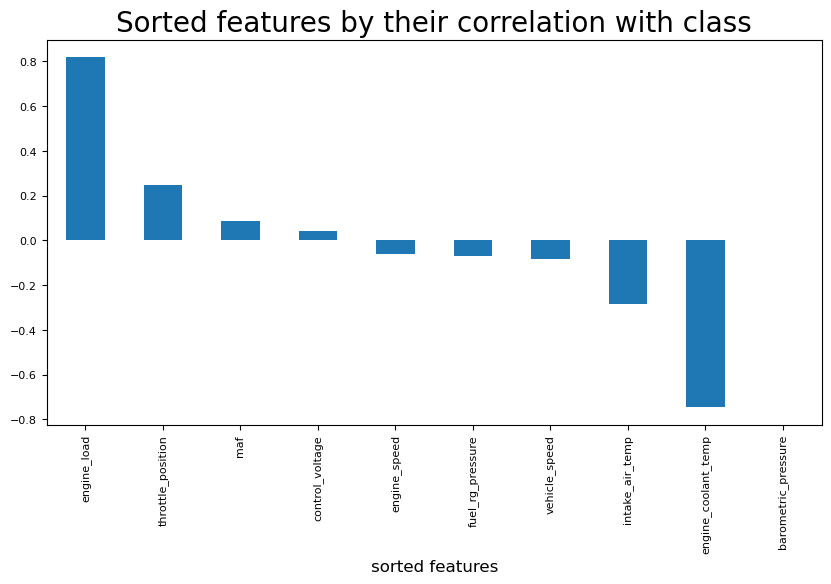

In [4]:
sorted_corr_cols, fig = correlation(
    df=df_pd[cont_cols],
    target=df_pd[target_col],
    scale="linear",
    plot=True,
)

sorted_corr_cols.head()

### Plotting
Predicted and actual/ground_truth values were gathered using LightGBM with Optuna optimizer on the dataset

/home/jovyan/success6g-edge/inference_model/eda/target/plotting.py:123: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax[i].set_xlim(


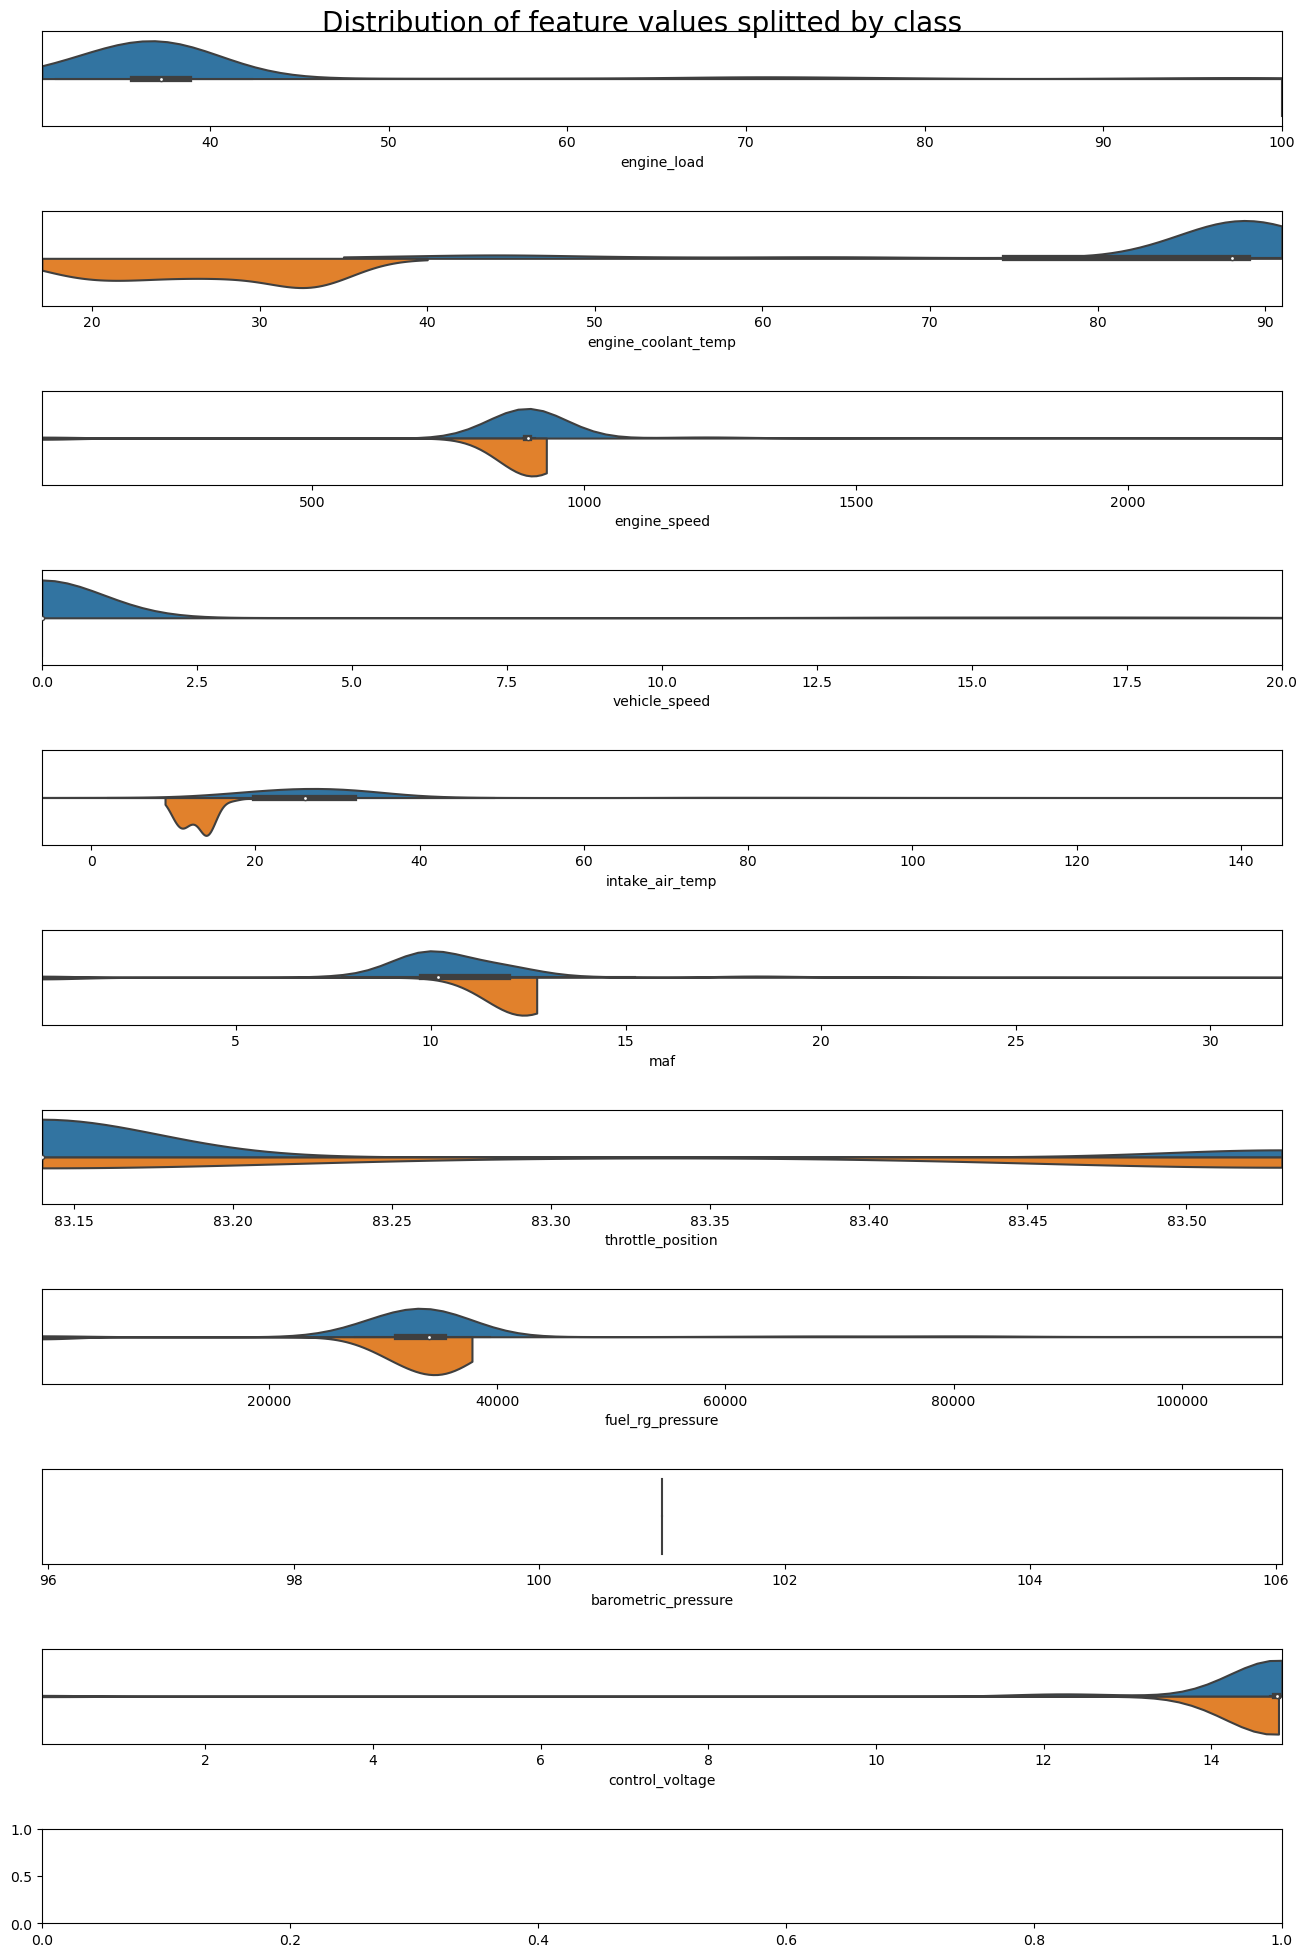

In [5]:
fig = distributions_in_binary_cls(
    df=df_pd[cont_cols],
    target=df_pd[target_col],
    low_per_cut=0,
    high_per_cut=1,
)